# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2024-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

# <h1><center>Actividad 10: Actividad de Integración</center></h1>

Esta actividad busca que conecten el trabajo de visualización con las herramientas de ML que hemos aprendido en el curso.

## Instrucciones

Esto Notebook contiene todas las instrucciones a realizar para la actividad. Si siente que falta alguna información debe agregar un supuesto en una celda adicional. No hay preguntas durante el trabajo.

Al finalizarla, deben subir el Notebook a la actividad disponible en Canvas, en la sección de Tareas bajo "Actividad 10".
    
**La actividad debe ser subida antes del final de la clase. Entregas posteriores a esa fecha serán evaluadas con nota 1.0.**

**Conteste las preguntas en forma precisa y usando celdas de Markdown cuando sea necesario para dejar clara la respuesta.**

## Actividad

Para esta actividad usaremos los mismos datos que usaron en la Interrogación 2, en una base simplificada llamada `oceanData.csv`, que está an la misma carpeta de GitHub que el Notebook de esta actividad. Este archivo CSV resulta de limpir y luego unir las bases `Bottle` y `Cast`.

## Rúbrica

- Si han logrado hasta el punto 2: 4.0
- Si han logrado hasta el punto 2.2 en forma parcial: 6.0
- Si han logrado todo: 7.0

In [3]:
# librerías necesarias para el ejercicio, puede agregar otras si lo necesita
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Base de datos

### 1.1 Lectura y preparación
Lea el archivo `oceanData.csv`, dejando la información en un DataFrame llamado `oceanData`. Luego agregue una columna llamada `decada` que agregue la década de esa muestra. (Recomendación: usar la columna `Year` para sacar la década correspondiente).

### 1.2 Visualización
Para cada década, grafique los datos de temperatura (independiente) vs salinidad (dependiente) en un `scatter plot` que muestre la salinidad como función de la temperatura. No olvide que todo gráfico debe tener nombres en los ejes.

In [7]:
oceanData = pd.read_csv("data/oceanData.csv")
oceanData

,Unnamed: 0,Date,Year,Month,Depthm,T_degC,Salnty,STheta
0,0,3/1/1949,1949,3,0,10.500,33.4400,25.64900
1,1,3/1/1949,1949,3,8,10.460,33.4400,25.65600
2,2,3/1/1949,1949,3,10,10.460,33.4370,25.65400
3,3,3/1/1949,1949,3,19,10.450,33.4200,25.64300
4,4,3/1/1949,1949,3,20,10.450,33.4210,25.64300
...,...,...,...,...,...,...,...,...
755072,755072,10/11/2020,2020,10,0,21.627,33.6670,23.30995
755073,755073,10/11/2020,2020,10,1,21.627,33.6670,23.31006
755074,755074,10/11/2020,2020,10,5,20.824,33.6265,23.49786
755075,755075,10/11/2020,2020,10,10,18.331,33.5133,24.05436


In [10]:
oceanData["decada"] = (oceanData["Year"]//10)*10

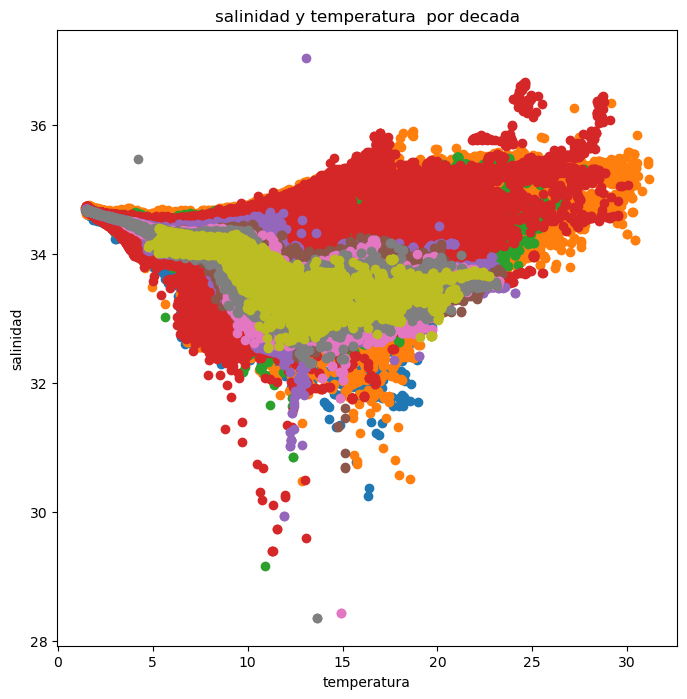

In [18]:
decadas = oceanData["decada"].unique()
plt.figure(figsize=(8,8))
for decada in sorted(decadas):
    datos_decada = oceanData[oceanData["decada"] == decada]
    plt.scatter(datos_decada["T_degC"], datos_decada["Salnty"])

plt.xlabel("temperatura")
plt.ylabel("salinidad")
plt.title("salinidad y temperatura  por decada")
plt.show()

## 2. Relaciones

Queremos ver si la relacion entre las variables medidas ha ido cambiando en el tiempo. En la Interrogación vimos que el mejor modelo era el multilineal, así que aprovecharemos eso para entender cómo cambia la relación entre las variables en el tiempo. (Si no supo cómo implementar el modelo multilineal, revise la solución de la I2 en el repositorio).

### 2.1 Modelos anuales
Para cada año, haga un modelo de regresión multilineal que considere la `Salinidad` como variable dependiente y las mediciones de `Temperatura`, `Profundidad` y `Densidad` como las variables independientes. No necesita separar los datos entre prueba y validación para este ejercicio.

En cada modelo, calcule el r², el RMSE y almacene los valores de $\beta_0$, $\beta_1$, $\beta_2$ y $\beta_3$ (los coeficientes de la regresión).

### 2.2 Visualización
Haga los siguientes gráficos:
- Un único gráfico que muestre, para cada año, el valor de los coeficientes de la regresión multilineal ($\beta_0$, $\beta_1$, $\beta_2$ y $\beta_3$). ¿Se mantienen estables a lo largo de los años?
- Un gráfico que muestre el valor de r² para cada año.
- Un gráfico que muestre el valor del RMSE para cada año. ¿Cambia el nivel de error a lo largo de los años?

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

años = oceanData["Year"].unique()

coef_temp = []
coef_dens = []
coef_prof =[]

for año in sorted(años):

    datos_año = oceanData[oceanData["Year"] == año]
    
    columna_y = "Salnty"
    
    y_train = np.array(datos_año[columna_y])
    
    #todas las columnas dependientes, osea las que no son la y
    X_train = np.array(datos_año[['T_degC', 'Depthm', 'STheta']])
    
    # creamos y entrenamos el modelo
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    # calculo de funcionamiento
    y_pred_train = linreg.predict(X_train)
    r2_lineal_train = linreg.score(X_train, y_train)
    rmse_train = mean_squared_error(y_train, y_pred_train)
    
    print('\nMétricas de Entrenamiento')
    print(f'r^2 : {r2_lineal_train}')
    print(f'RMSE {rmse_train}')
    print(f'Coeficientes: {linreg.coef_[0], linreg.intercept_}')
    
    #predecir valores de y para el set de prueba
    #y_pred_test = linreg.predict(X_test)
    #r2_lineal_test = linreg.score(X_test, y_test)
    #rmse_test = mean_squared_error(y_test, y_pred_test)
    
    #print('\nMétricas de Prueba')
    #print(f'r^2 : {r2_lineal_test}')
    #print(f'RMSE {rmse_test}')

    coef_temp.append(linreg.coef_[0])
    coef_prof.append(linreg.coef_[1])
    coef_dens.append(linreg.coef_[2])
print("coef_temp")
print(coef_temp)
print("coef_prof")
print(coef_prof)
print("coef_dens")
print(coef_dens)


Métricas de Entrenamiento
r^2 : 0.9749500761500602
RMSE 0.007604966810795886
Coeficientes: (0.2566007811534826, -2.619708113535495)

Métricas de Entrenamiento
r^2 : 0.9728113776512866
RMSE 0.007190898577151762
Coeficientes: (0.2616069271204052, -2.2726170189519905)

Métricas de Entrenamiento
r^2 : 0.9418405178994602
RMSE 0.014754209237833939
Coeficientes: (0.2801293177329683, -3.7672898238589667)

Métricas de Entrenamiento
r^2 : 0.9787248533588072
RMSE 0.0046454832824755835
Coeficientes: (0.25905663530499123, -1.3200657260451365)

Métricas de Entrenamiento
r^2 : 0.9774654859169964
RMSE 0.004319979826789785
Coeficientes: (0.2627631408287049, -1.9995391223119583)

Métricas de Entrenamiento
r^2 : 0.9702433668585467
RMSE 0.006522775840559853
Coeficientes: (0.2741852803137072, -2.953284885700704)

Métricas de Entrenamiento
r^2 : 0.9508939462189494
RMSE 0.010978036114716363
Coeficientes: (0.2736435702688627, -4.190100335370779)

Métricas de Entrenamiento
r^2 : 0.9486318805438868
RMSE 0.0146

## Última parte: apoyo a la licenciatura

Ahora que ha terminado la Actividad, les agradeceríamos visitar la página en Canvas del curso y contestar la encuesta docente. Es una herramienta muy útil para nosotros pues nos permite fortalecer el programa de Licenciatura y apoyar el desarrollo de los Científicos/as de Datos que egresarán del IMC.

Muchas gracias.